In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_file = os.getenv('HOME') + '/aiffel/Datathon/energy/train.csv'
test_file = os.getenv('HOME') + '/aiffel/Datathon/energy/test.csv'
submission = os.getenv('HOME') + '/aiffel/Datathon/energy/test.csv'

In [3]:
df_train = pd.read_csv(train_file, encoding='cp949')
df_test = pd.read_csv(test_file, encoding='cp949')

In [4]:
print(df_train.shape, df_test.shape)

(122400, 10) (10080, 9)


In [5]:
train = df_train.copy()
test = df_test.copy()

In [6]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [7]:
test.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 한글 열 이름 변경
cols = ["num", "date_time", "energy", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]
cols2 = ["num", "date_time", "temp", "windspeed", "humidity", "precipitation", "sun", "cooler", "solar"]


train.columns = cols
test.columns = cols2

In [9]:
train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [10]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for col in ['temp','windspeed','humidity','precipitation','sun']:
    test[col] = test[col].interpolate(method='linear')

pd.options.display.float_format = '{:.2f}'.format
test.head(10)

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,NaN,NaN
1,1,2020-08-25 01,27.63,1.37,75.33,0.00,0.00,NaN,NaN
2,1,2020-08-25 02,27.47,1.23,76.67,0.00,0.00,NaN,NaN
3,1,2020-08-25 03,27.30,1.10,78.00,0.00,0.00,NaN,NaN
4,1,2020-08-25 04,26.90,1.17,79.67,0.00,0.00,NaN,NaN
5,1,2020-08-25 05,26.50,1.23,81.33,0.00,0.00,NaN,NaN
6,1,2020-08-25 06,26.10,1.30,83.00,0.00,0.00,NaN,NaN
7,1,2020-08-25 07,27.00,1.27,81.00,0.00,0.37,NaN,NaN
8,1,2020-08-25 08,27.90,1.23,79.00,0.00,0.73,NaN,NaN
9,1,2020-08-25 09,28.80,1.20,77.00,0.00,1.10,NaN,NaN


In [12]:
test["cooler"].nunique(), test["solar"].nunique()

(1, 1)

In [13]:
test = test.fillna(0)

In [14]:
test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar
0,1,2020-08-25 00,27.80,1.50,74.00,0.00,0.00,0.00,0.00
1,1,2020-08-25 01,27.63,1.37,75.33,0.00,0.00,0.00,0.00
2,1,2020-08-25 02,27.47,1.23,76.67,0.00,0.00,0.00,0.00
3,1,2020-08-25 03,27.30,1.10,78.00,0.00,0.00,0.00,0.00
4,1,2020-08-25 04,26.90,1.17,79.67,0.00,0.00,0.00,0.00


In [15]:
test.isnull().sum()

num              0
date_time        0
temp             0
windspeed        0
humidity         0
precipitation    0
sun              0
cooler           0
solar            0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num            122400 non-null  int64  
 1   date_time      122400 non-null  object 
 2   energy         122400 non-null  float64
 3   temp           122400 non-null  float64
 4   windspeed      122400 non-null  float64
 5   humidity       122400 non-null  float64
 6   precipitation  122400 non-null  float64
 7   sun            122400 non-null  float64
 8   cooler         122400 non-null  float64
 9   solar          122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [17]:
# date_time을 datetime으로 변환해주기

train["date_time"] = pd.to_datetime(train["date_time"])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num            122400 non-null  int64         
 1   date_time      122400 non-null  datetime64[ns]
 2   energy         122400 non-null  float64       
 3   temp           122400 non-null  float64       
 4   windspeed      122400 non-null  float64       
 5   humidity       122400 non-null  float64       
 6   precipitation  122400 non-null  float64       
 7   sun            122400 non-null  float64       
 8   cooler         122400 non-null  float64       
 9   solar          122400 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 9.3 MB


In [18]:
train["date"] = train["date_time"].dt.date # 전체 날짜
train["month"] = train["date_time"].dt.month # 월
train["day"] = train["date_time"].dt.day # 일
train["hour"] = train["date_time"].dt.hour
train["weekday"] = train["date_time"].dt.weekday # 0: 월요일
train["weekend"] = train["weekday"].isin([5, 6]).astype(int) # 5: 토요일

train.head()

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0


In [19]:
test["date_time"] = pd.to_datetime(test["date_time"])

In [20]:
test["date"] = test["date_time"].dt.date # 전체 날짜
test["month"] = test["date_time"].dt.month # 월
test["day"] = test["date_time"].dt.day # 일
test["hour"] = test["date_time"].dt.hour
test["weekday"] = test["date_time"].dt.weekday # 0: 월요일
test["weekend"] = test["weekday"].isin([5, 6]).astype(int) # 5: 토요일

test.head()

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend
0,1,2020-08-25 00:00:00,27.80,1.50,74.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,0,1,0
1,1,2020-08-25 01:00:00,27.63,1.37,75.33,0.00,0.00,0.00,0.00,2020-08-25,8,25,1,1,0
2,1,2020-08-25 02:00:00,27.47,1.23,76.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,2,1,0
3,1,2020-08-25 03:00:00,27.30,1.10,78.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,3,1,0
4,1,2020-08-25 04:00:00,26.90,1.17,79.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,4,1,0


In [21]:
# CDH(Cooling Degree Hour) 변수 추가
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,61,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

In [22]:
cdhs = np.array([])
for num in range(1,61,1):
    temp = test[test['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs


In [23]:
# THI(불쾌지수) 변수 추가
train['THI'] = 9/5*train['temp'] - 0.55*(1-train['humidity']/100)*(9/5*train['humidity']-26)+32
test['THI'] = 9/5*test['temp'] - 0.55*(1-test['humidity']/100)*(9/5*test['humidity']-26)+32

In [24]:
# sensible(체감온도) 변수 추가
train['sensible']=13.12+0.6215*train['temp']-13.947*train['windspeed']**0.16+0.486*train['temp']*train['windspeed']**0.16
test['sensible']=13.12+0.6215*test['temp']-13.947*test['windspeed']**0.16+0.486*test['temp']*test['windspeed']**0.16

In [25]:
train

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,CDH,THI,sensible
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,2020-06-01,6,1,0,0,0,-8.40,57.54,17.81
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,2020-06-01,6,1,1,0,0,-16.70,57.04,17.78
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,2,0,0,-25.20,56.68,17.44
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,3,0,0,-34.10,55.96,16.96
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,2020-06-01,6,1,4,0,0,-43.10,56.46,16.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.37,27.80,2.30,68.00,0.00,0.70,1.00,1.00,2020-08-24,8,24,19,0,0,30.80,65.07,29.90
122396,60,2020-08-24 20:00:00,3975.70,27.30,1.20,71.00,0.00,0.00,1.00,1.00,2020-08-24,8,24,20,0,0,32.30,64.90,29.39
122397,60,2020-08-24 21:00:00,3572.21,27.30,1.80,71.00,0.00,0.00,1.00,1.00,2020-08-24,8,24,21,0,0,32.50,64.90,29.34
122398,60,2020-08-24 22:00:00,3299.18,27.10,1.80,74.00,0.00,0.00,1.00,1.00,2020-08-24,8,24,22,0,0,31.30,65.45,29.11


In [26]:
test

,num,date_time,temp,windspeed,humidity,precipitation,sun,cooler,solar,date,month,day,hour,weekday,weekend,CDH,THI,sensible
0,1,2020-08-25 00:00:00,27.80,1.50,74.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,0,1,0,1.80,66.71,29.93
1,1,2020-08-25 01:00:00,27.63,1.37,75.33,0.00,0.00,0.00,0.00,2020-08-25,8,25,1,1,0,3.43,66.87,29.75
2,1,2020-08-25 02:00:00,27.47,1.23,76.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,2,1,0,4.90,67.07,29.57
3,1,2020-08-25 03:00:00,27.30,1.10,78.00,0.00,0.00,0.00,0.00,2020-08-25,8,25,3,1,0,6.20,67.30,29.40
4,1,2020-08-25 04:00:00,26.90,1.17,79.67,0.00,0.00,0.00,0.00,2020-08-25,8,25,4,1,0,7.10,67.29,28.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.63,3.57,66.00,0.00,0.53,0.00,0.00,2020-08-31,8,31,19,0,0,22.40,66.19,30.88
10076,60,2020-08-31 20:00:00,28.27,3.83,67.00,0.00,0.27,0.00,0.00,2020-08-31,8,31,20,0,0,25.40,65.71,30.43
10077,60,2020-08-31 21:00:00,27.90,4.10,68.00,0.00,0.00,1.00,1.00,2020-08-31,8,31,21,0,0,27.70,65.25,29.97
10078,60,2020-08-31 22:00:00,27.90,4.10,68.00,0.00,0.00,0.00,0.00,2020-08-31,8,31,22,0,0,29.30,65.25,29.97


# 가설1) 습도가 낮고 온도가 높은 날보다, 습도가 높고 온도가 높은 날에 에너지 사용량(에어컨 등)이 높을 것이다.

In [27]:
train['THI_c']=pd.cut(train.THI, bins=[50, 68, 75, 80, 90], labels=["Low", "Ordinary", "High", "Very High"])

TypeError: 'value' must be an instance of str or bytes, not a float

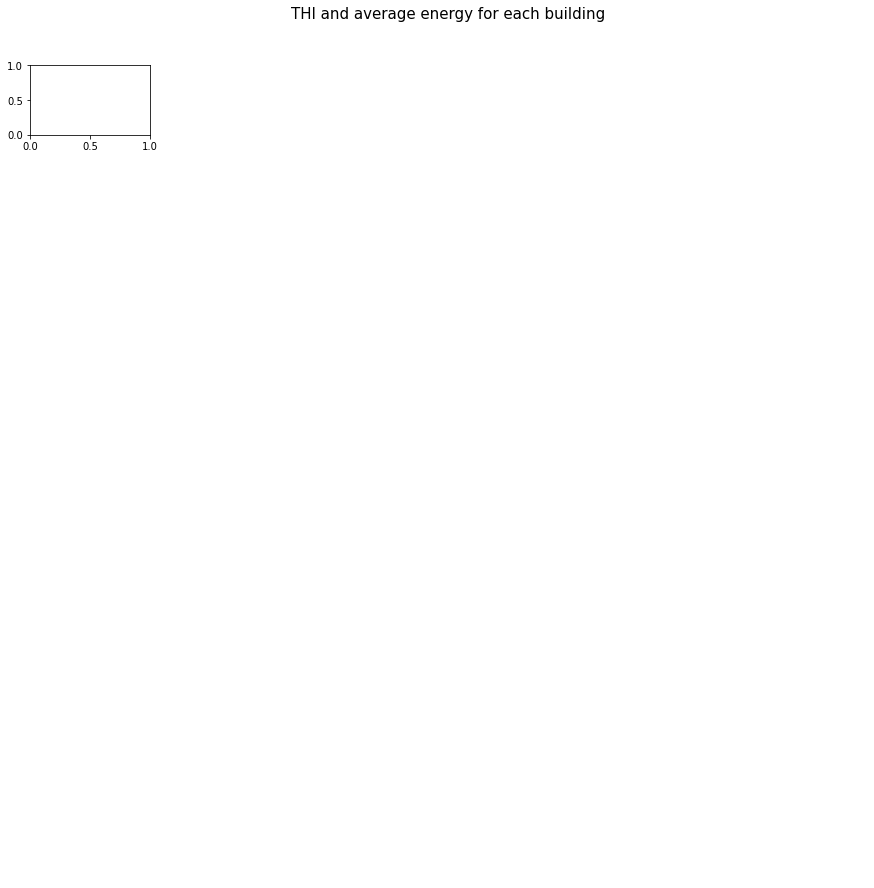

In [28]:
# 불쾌지수
fig = plt.figure(figsize = (15 ,15))
plt.title("THI and average energy for each building", fontsize=15, y=1.05)
plt.axis('off')

colors = ['pink','bisque','skyblue','lightgrey']

for num in train['num'].unique():
    df = train[train.num==num]
    df_counts = df.groupby('THI_c')['energy'].mean()
    ax = fig.add_subplot(10,6,num)
    THI_unique = df['THI_c'].unique()
    ax.bar(THI_unique, df_counts, color=colors)
    ax.set_title(f'building: {num}')

plt.tight_layout()
plt.show()

- 전반적으로 기온, 불쾌지수, 전력사용량의 추이가 비슷함

**정리**       
기온과 습도의 선형변환이기 때문에 새로 생성한 불쾌지수가 기온의 추세와 크게 다르지는 않겠지만, 불쾌지수 구간을 활용하여 또 다른 feature를 활용할 수 있을 것 같음

# 가설2) 태양광보유에 따라 전력사용량이 차이가 날 것이다.
- 태양광 유무에 따라 전력사용량-불쾌지수-태양광 발전량을 함께 비교
- sun : 일조
- solar : 태양광보유
- solarPower : 태양광 발전량

* 온도/습도/풍속/강수량/일조량 등이 태양광 발전량에 영향을 미치는 요소입니다.
> 풍속/일조량 >> → 태양광 발전량 >>       
> 습도/강수량 << → 태양광 발전량 >>
- 여기서는 정확한 관계식을 구하는 것이 목적이 아니라, 각 feature들이 태양광 발전량과의 비례/반비례 관계만을 고려
- 강수량은 0mm이면 1, 0>이면 1보다 작은 값을 주기 위해 exp^-x 함수를 사용

참고 : https://dacon.io/competitions/official/235736/codeshare/2751?page=2&dtype=recent

In [29]:
# 태양광 발전량
train['solarPower'] =  train['sun'] * train['solar'] * train['precipitation'].map(lambda x : np.exp(-x)) * train['windspeed'] / train['humidity'] * 100

In [30]:
print('태양광 없는 건물 :' , train[train['solar'] == 1]['num'].unique())

태양광 없는 건물 : [ 3  4  8  9 12 14 16 21 23 24 26 27 30 34 36 37 38 39 40 42 43 44 45 47
 51 52 55 56 60]


In [31]:
print('태양광 있는 건물 :', train[train['solar'] == 0]['num'].unique())

태양광 있는 건물 : [ 1  2  5  6  7 10 11 13 15 17 18 19 20 22 25 28 29 31 32 33 35 41 46 48
 49 50 53 54 57 58 59]


In [32]:
train[train['solar'] == 0]['num'].nunique()

31

In [33]:
train[train['solar'] == 1]['num'].nunique()

29

In [34]:
solar_df_0 = train.copy()
solar_df_1 = train.copy()

In [41]:
solar_df_0['energy_mean0'] = train[train['solar'] == 0]['energy'].mean()
solar_df_0['solarPower_mean0'] = train[train['solar'] == 0]['solarPower'].mean()
solar_df_0['THI_mean0'] = train[train['solar'] == 0]['THI'].mean()

In [42]:
solar_df_0[]

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,...,weekday,weekend,CDH,THI,sensible,THI_c,solarPower,energy_mean0,solarPower_mean0,THI_mean0
0,1,2020-06-01 00:00:00,8179.06,17.60,2.50,92.00,0.80,0.00,0.00,0.00,...,0,0,-8.40,57.54,17.81,Low,0.00,2093.14,0.00,65.05
1,1,2020-06-01 01:00:00,8135.64,17.70,2.90,91.00,0.30,0.00,0.00,0.00,...,0,0,-16.70,57.04,17.78,Low,0.00,2093.14,0.00,65.05
2,1,2020-06-01 02:00:00,8107.13,17.50,3.20,91.00,0.00,0.00,0.00,0.00,...,0,0,-25.20,56.68,17.44,Low,0.00,2093.14,0.00,65.05
3,1,2020-06-01 03:00:00,8048.81,17.10,3.20,91.00,0.00,0.00,0.00,0.00,...,0,0,-34.10,55.96,16.96,Low,0.00,2093.14,0.00,65.05
4,1,2020-06-01 04:00:00,8043.62,17.00,3.30,92.00,0.00,0.00,0.00,0.00,...,0,0,-43.10,56.46,16.80,Low,0.00,2093.14,0.00,65.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.37,27.80,2.30,68.00,0.00,0.70,1.00,1.00,...,0,0,30.80,65.07,29.90,Low,2.37,2093.14,0.00,65.05
122396,60,2020-08-24 20:00:00,3975.70,27.30,1.20,71.00,0.00,0.00,1.00,1.00,...,0,0,32.30,64.90,29.39,Low,0.00,2093.14,0.00,65.05
122397,60,2020-08-24 21:00:00,3572.21,27.30,1.80,71.00,0.00,0.00,1.00,1.00,...,0,0,32.50,64.90,29.34,Low,0.00,2093.14,0.00,65.05
122398,60,2020-08-24 22:00:00,3299.18,27.10,1.80,74.00,0.00,0.00,1.00,1.00,...,0,0,31.30,65.45,29.11,Low,0.00,2093.14,0.00,65.05


In [37]:
solar_df_1['energy_mean1'] = train[train['solar'] == 1]['energy'].mean()
solar_df_1['solarPower_mean1'] = train[train['solar'] == 1]['solarPower'].mean()
solar_df_1['THI_mean1'] = train[train['solar'] == 1]['THI'].mean()

In [46]:
solar_df_1['solarPower_mean1'].unique()

array([0.86518438])

(50.0, 100.0)

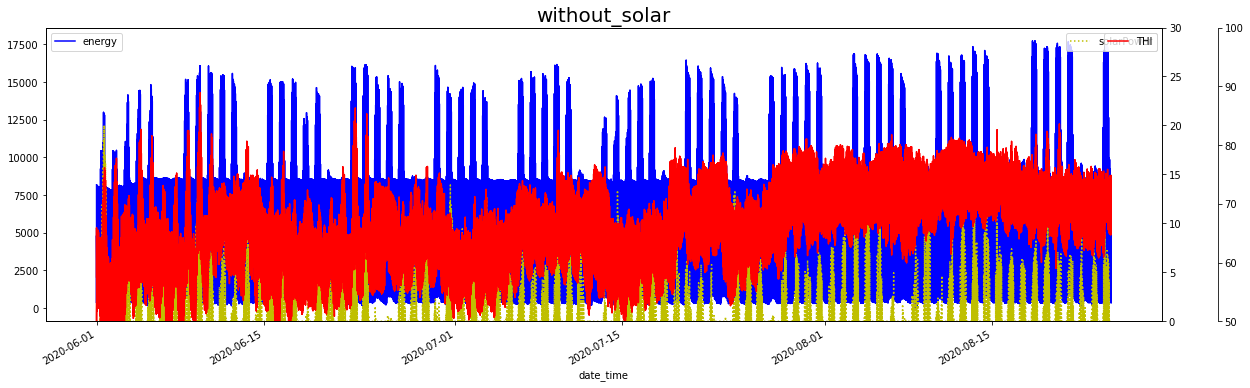

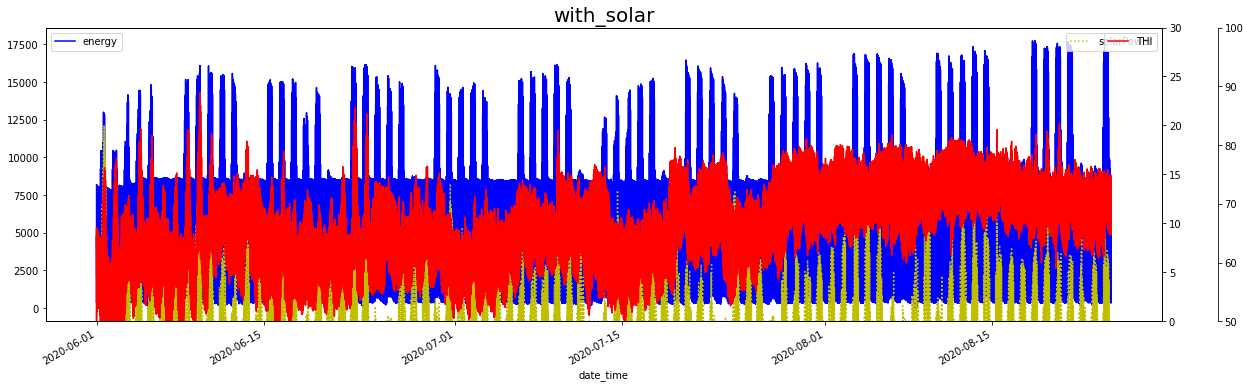

In [40]:
# without_solar

fig, ax = plt.subplots(figsize = (20, 4))
ax2 = ax.twinx()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
plt.title("without_solar", fontsize=20)

solar_df_1.plot(x = 'date_time', y = ['energy'], ax = ax, color='b')
solar_df_1.plot(x = 'date_time', y = ['solarPower'],figsize = (20, 6), ax = ax2, color = 'y', ls = 'dotted')
solar_df_1.plot(x = 'date_time', y = ['THI'],figsize =(20, 6), ax = ax3, color = 'r')

ax2.set_ylim(0, 30)
ax3.set_ylim(50, 100)


# with_solar

fig, ax = plt.subplots(figsize = (20, 4))
ax2 = ax.twinx()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
plt.title("with_solar", fontsize=20)

solar_df_0.plot(x = 'date_time', y = ['energy'], ax = ax, color='b')
solar_df_0.plot(x = 'date_time', y = ['solarPower'],figsize = (20, 6), ax = ax2, color = 'y', ls = 'dotted')
solar_df_0.plot(x = 'date_time', y = ['THI'],figsize =(20, 6), ax = ax3, color = 'r')

ax2.set_ylim(0, 30)
ax3.set_ylim(50, 100)

- 태양광이 있을 때 발전량의 정도에 따라 전력사용량이 추세가 달라지는 것으로 보임
- 태양광이 없을 때 불쾌지수와 발전량의 경향이 유사함

# 가설3) 비전기냉방설비운영이 있는 경우 전력사용량을 줄여주는 효과가 있을 것이다.


**피크 시간 비교**       
동일한 요일의 동일한 시간에 냉방 시스템의 유무에 따른 산점도를 비교

In [47]:
# 'energy' 스케일링
for i in range(1, 61):
    mean_ = train.loc[train.num == i].energy.mean()
    std_ = train.loc[train.num == i].energy.std()
    train.loc[train.num == i, 'energy_sc'] = ((train.loc[train.num == i, 'energy']) - mean_) / std_
print(train['energy_sc'])

0        -2.80
1        -3.13
2        -3.35
3        -3.80
4        -3.84
          ... 
122395    1.84
122396    1.50
122397    0.53
122398   -0.13
122399   -0.36
Name: energy_sc, Length: 122400, dtype: float64


In [48]:
peak_df_1 = train.loc[(train.weekday == 2) & (train.hour == 14) & (train.cooler == 1)]
peak_df_0 = train.loc[(train.weekday == 2) & (train.hour == 14) & (train.cooler == 0)]

In [49]:
peak_df_1

,num,date_time,energy,temp,windspeed,humidity,precipitation,sun,cooler,solar,...,day,hour,weekday,weekend,CDH,THI,sensible,THI_c,solarPower,energy_sc
2102,2,2020-06-03 14:00:00,1623.89,24.20,4.80,71.00,0.00,1.00,1.00,0.00,...,3,14,2,0,-63.10,59.32,25.35,Low,0.00,0.96
2270,2,2020-06-10 14:00:00,1840.97,27.60,3.30,61.00,0.00,1.00,1.00,0.00,...,10,14,2,0,-12.30,63.70,29.63,Low,0.00,1.61
2438,2,2020-06-17 14:00:00,1665.36,25.70,1.40,51.00,0.00,0.30,1.00,0.00,...,17,14,2,0,-37.00,60.53,27.56,Low,0.00,1.09
2606,2,2020-06-24 14:00:00,1707.48,25.00,1.50,69.00,0.00,0.00,1.00,0.00,...,24,14,2,0,-32.80,60.26,26.74,Low,0.00,1.21
2774,2,2020-07-01 14:00:00,1691.60,22.70,6.00,74.00,0.00,0.60,1.00,0.00,...,1,14,2,0,-59.60,57.53,23.35,Low,0.00,1.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121598,60,2020-07-22 14:00:00,3719.52,23.50,2.10,93.00,0.00,0.00,1.00,1.00,...,22,14,2,0,-38.90,68.86,24.88,Ordinary,0.00,0.88
121766,60,2020-07-29 14:00:00,3706.99,24.50,1.80,97.00,4.40,0.00,1.00,1.00,...,29,14,2,0,-25.70,73.65,26.11,Ordinary,0.00,0.85
121934,60,2020-08-05 14:00:00,4356.29,27.50,2.70,84.00,0.00,0.00,1.00,1.00,...,5,14,2,0,1.30,70.48,29.53,Ordinary,0.00,2.43
122102,60,2020-08-12 14:00:00,4248.29,28.10,3.10,72.00,0.00,0.80,1.00,1.00,...,12,14,2,0,-5.90,66.63,30.24,Low,3.44,2.17


In [50]:
peak_df_0.value_counts()

num  date_time            energy   temp   windspeed  humidity  precipitation  sun   cooler  solar  date        month  day  hour  weekday  weekend  CDH     THI    sensible  THI_c     solarPower  energy_sc
1    2020-06-03 14:00:00  8458.99  26.80  2.70       50.00     0.00           1.00  0.00    0.00   2020-06-03  6      3    14    2        0        -58.80  62.64  28.70     Low       0.00        -0.65        1
32   2020-08-19 14:00:00  2503.66  31.60  3.00       65.00     0.00           1.00  0.00    0.00   2020-08-19  8      19   14    2        0        3.80    71.36  34.44     Ordinary  0.00        2.70         1
36   2020-06-10 14:00:00  1284.77  23.10  2.50       92.00     1.20           0.00  0.00    1.00   2020-06-10  6      10   14    2        0        -29.60  67.44  24.33     Low       0.00        0.84         1
     2020-06-17 14:00:00  1269.22  21.60  1.30       69.00     0.20           0.00  0.00    1.00   2020-06-17  6      17   14    2        0        -49.00  54.14  22.95  

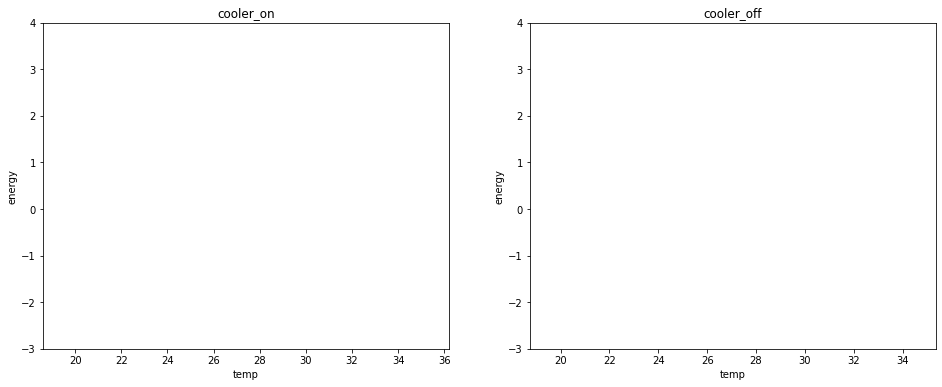

In [51]:
fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("cooler_on")
sns.regplot(data=peak_df_1, x='temp', y='energy')
plt.ylim(top=4, bottom=-3)

plt.subplot(1, 2, 2)
plt.title("cooler_off")
sns.regplot(data=peak_df_0, x='temp', y='energy')
plt.ylim(top=4, bottom=-3)

plt.show()

- Cooler를 설치한 건물과 설치하지 않은 건물의 뚜렷한 차이는 보이지 않지만 Cooler를 설치한 건물은 기온 대비 전력 소모량이 다소 높게 형성이 되어 있음
- 즉, Cooler를 설치하지 않은 건물들 대비, 절대적인 전력 소모량이 많은 건물들일 가능성이 높음

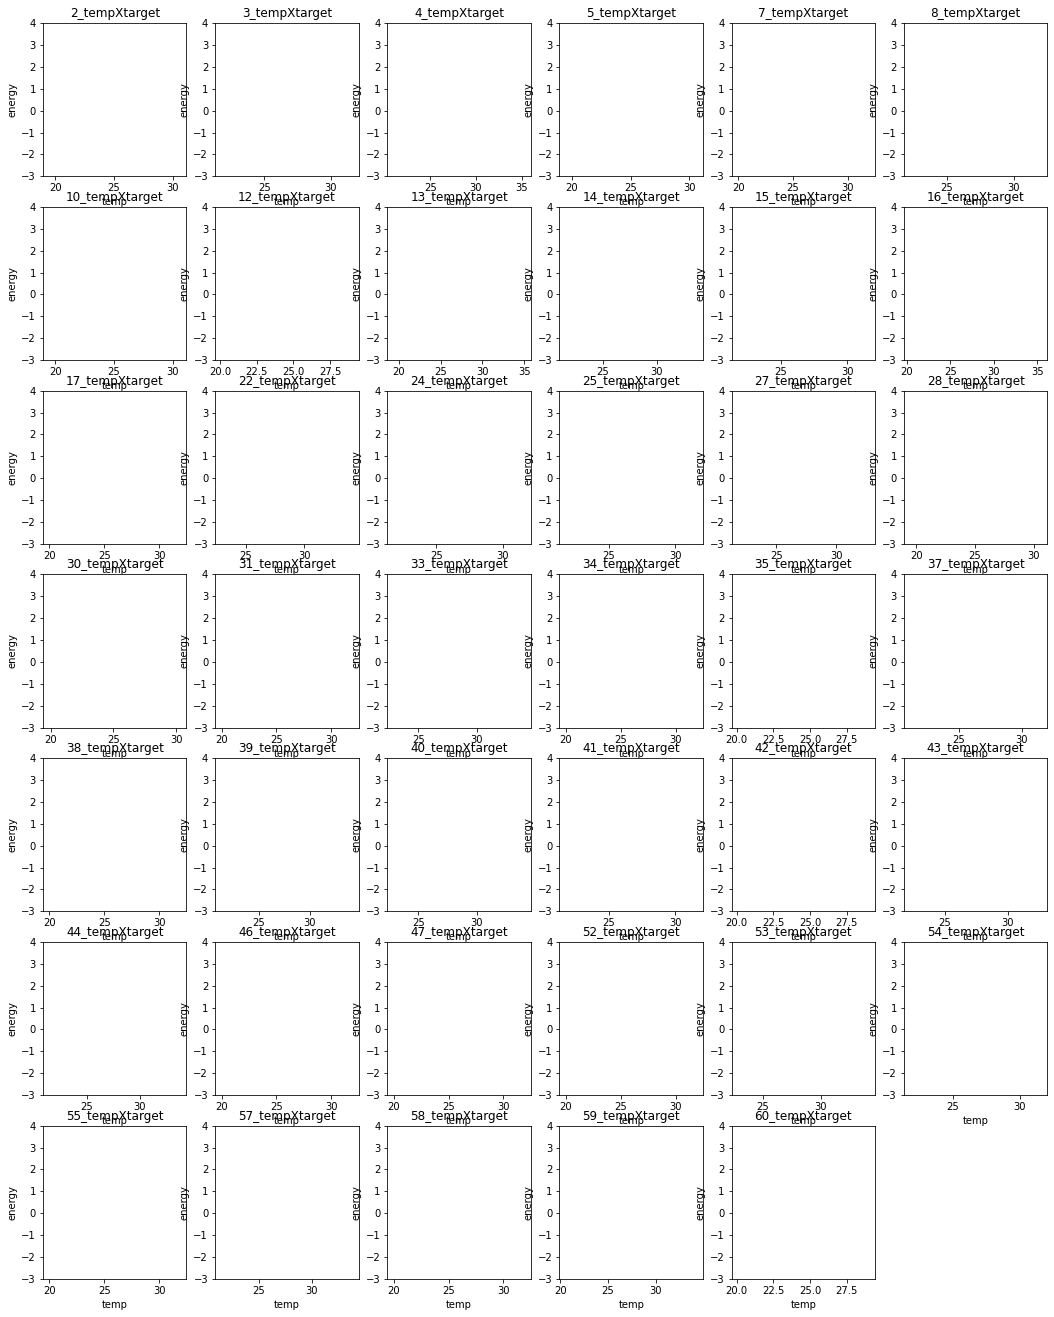

In [52]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(peak_df_1.num.unique()):
    plt.subplot(12, 6, i+1)
    plt.title("{}_tempXtarget".format(n))
    sns.regplot(data=peak_df_1.loc[peak_df_1.num == n], x='temp', y='energy')
    plt.ylim(top=4, bottom=-3)

- Cooler를 설치한 건물별로 시각화한 결과, 대다수의 건물들의 플롯이 상단에 형성되어 있음

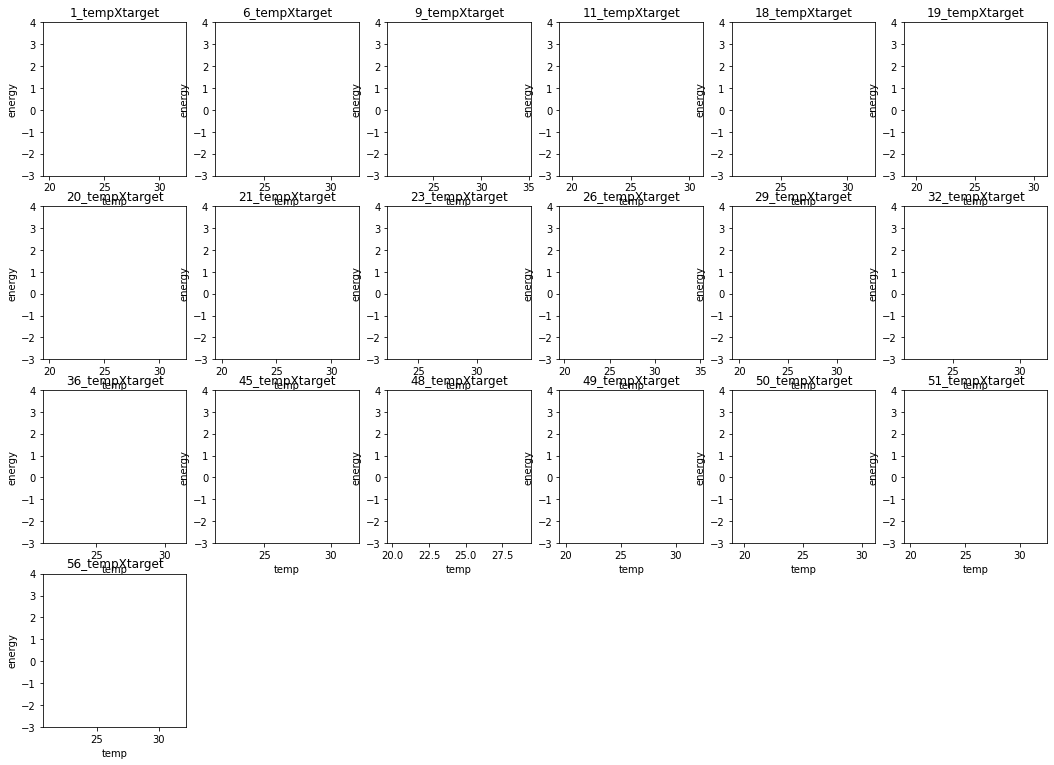

In [53]:
fig = plt.figure(figsize=(18, 40))
for i, n in enumerate(peak_df_0.num.unique()):
    plt.subplot(12, 6, i+1)
    plt.title("{}_tempXtarget".format(n))
    sns.regplot(data=peak_df_0.loc[peak_df_0.num == n], x='temp', y='energy')
    plt.ylim(top=4, bottom=-3)

- Cooler를 설치하지 않은 건물들은 상대적으로 전력 소모량이 적음

**정리**   
1. Cooler를 설치한 건물들과 설치하지 않은 건물들에서 설치 여부에 따른 전력 소모량 차이는 크지 않아 보임
2. Cooler를 설치한 건물들은 설치하지 않은 건물보다 비교적으로 전력 소모량이 많음
3. Cooler 설치 여부에 따른 전력 소모량의 관계를 정확히 밝혀낼 수는 없지만, 전력 소모량이 많은 건물들 위주로 Cooler를 설치했다는 것을 유추할 수 있음